In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.svm import SVC     ### SVM for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

import random
import numpy as np
import math
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 

In [45]:
df = pd.read_csv('data/heart.csv', header = 0) 
#     r,c = df.shape
# df.columns.values[0] = "target"

In [46]:
Y = df[['target']]
X = df.iloc[:,df.columns !='target']

In [47]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,  stratify=Y, train_size=0.7)        
r,c = df.shape
feature_names = [i for i in range(X_Train.shape[1])]

/Users/kieuanh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


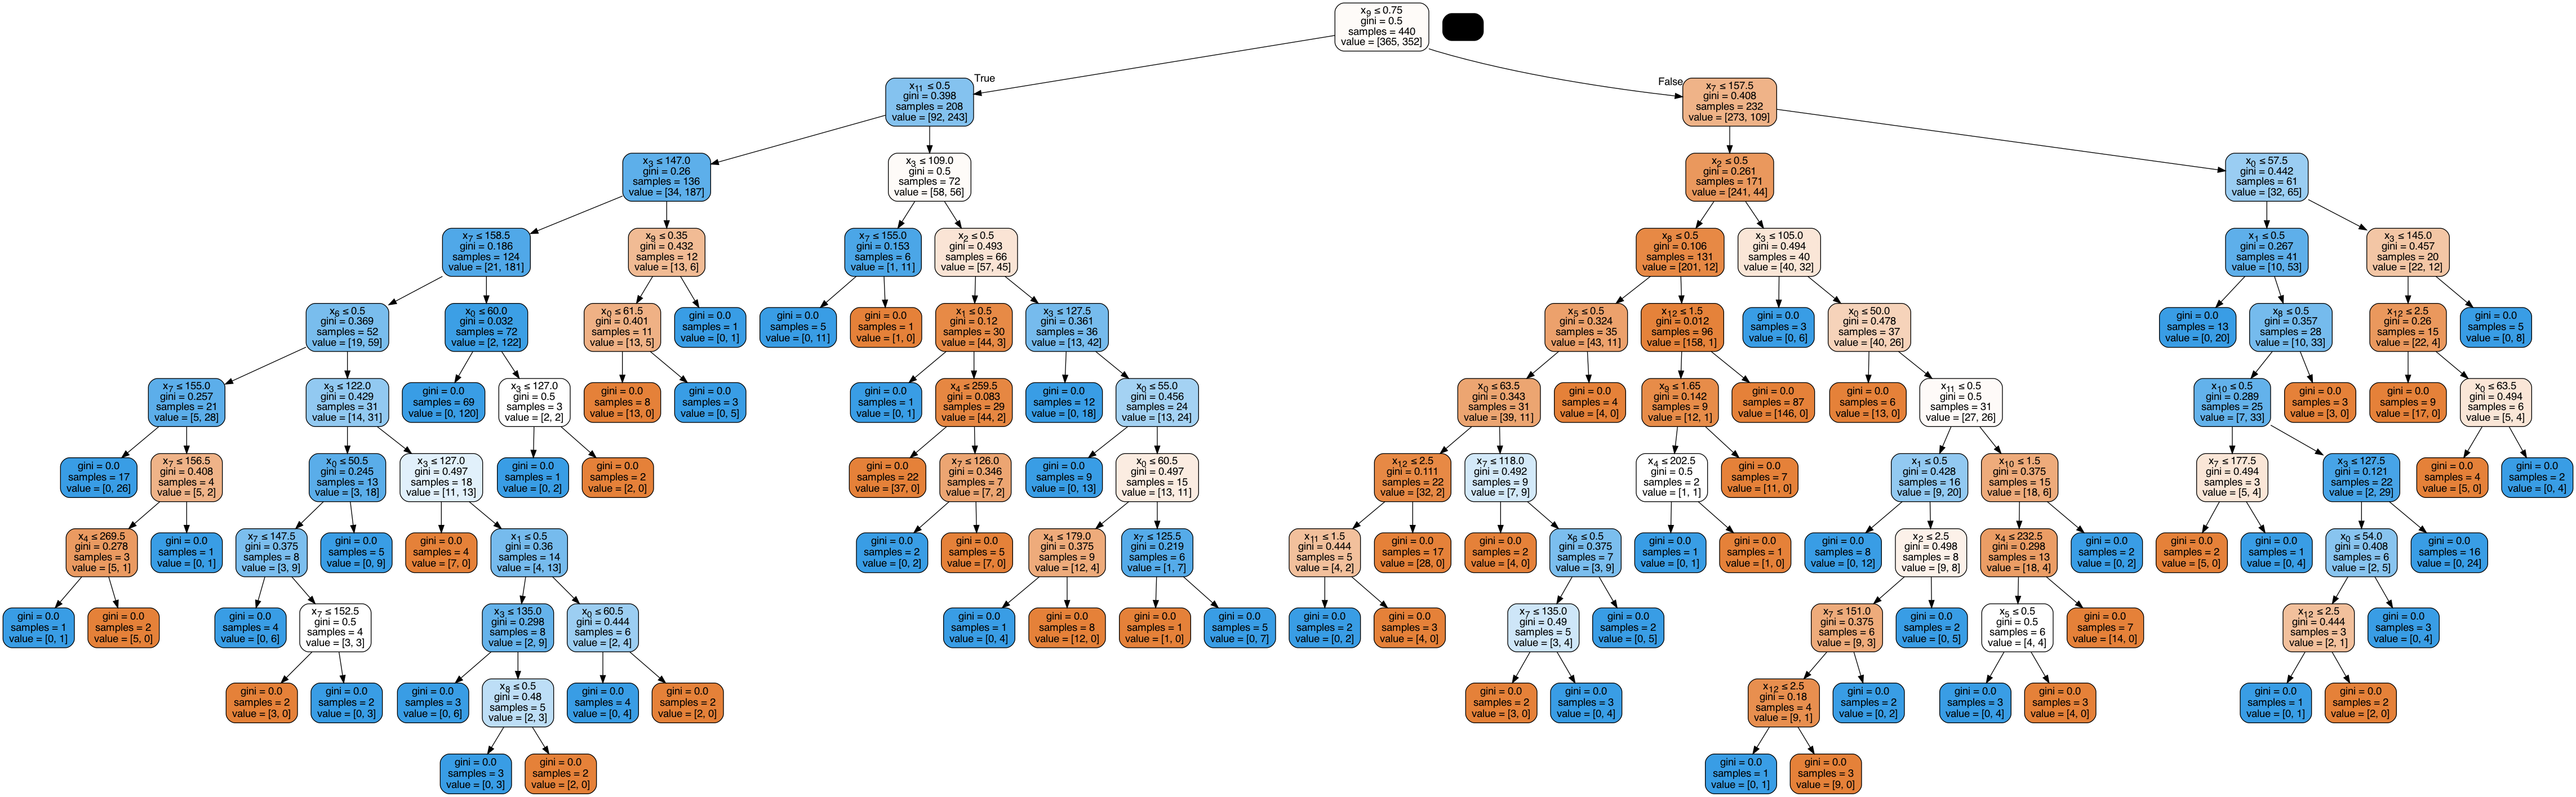

[ 9 11  3  7  6  7 -2  7  4 -2 -2 -2  3  0  7 -2  7 -2 -2 -2  3 -2  1  3
 -2  8 -2 -2  0 -2 -2  0 -2  3 -2 -2  9  0 -2 -2 -2  3  7 -2 -2  2  1 -2
  4 -2  7 -2 -2  3 -2  0 -2  0  4 -2 -2  7 -2 -2  7  2  8  5  0 12 11 -2
 -2 -2  7 -2  6  7 -2 -2 -2 -2 12  9  4 -2 -2 -2 -2  3 -2  0 -2 11  1 -2
  2  7 12 -2 -2 -2 -2 10  4  5 -2 -2 -2 -2  0  1 -2  8 10  7 -2 -2  3  0
 12 -2 -2 -2 -2 -2  3 12 -2  0 -2 -2 -2]
[9, 11, 3, 7, 6, 7, 7, 4, 3, 0, 7, 7, 3, 1, 3, 8, 0, 0, 3, 9, 0, 3, 7, 2, 1, 4, 7, 3, 0, 0, 4, 7, 7, 2, 8, 5, 0, 12, 11, 7, 6, 7, 12, 9, 4, 3, 0, 11, 1, 2, 7, 12, 10, 4, 5, 0, 1, 8, 10, 7, 3, 0, 12, 3, 12, 0]


In [48]:
from IPython.display import display, Image
import pydotplus

rf = RandomForestClassifier(n_estimators = 1)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,  stratify=Y, train_size=0.7)        
rf.fit(X = X_Train, y = Y_Train)
    
# Now plot the trees individually
for dtree in rf.estimators_:
    dot_data = tree.export_graphviz(dtree
                                    , out_file = None
                                    , filled   = True
                                    , rounded  = True
                                    , special_characters = True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    img = Image(graph.create_png())
    display(img)
    features  = dtree.tree_.feature
    print(features)
    featureIndex = [num for num in features if num != -2]
    print(featureIndex)
    
#     draw_tree(inp_tree = dtree)

In [49]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value     = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [50]:
target_vals = list(np.sort(np.unique(Y_Train)))
target_names = ["y" + str(i) for i in target_vals]

In [51]:
for idx, dtree in enumerate(rf.estimators_):    
    get_code(tree = dtree, feature_names = feature_names, target_names = target_names)

TypeError: can only concatenate str (not "int") to str